In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt 

### Reformat Data

In [ ]:
import os
from tqdm import tqdm
import pandas as pd

# Define input and output directories
raw_main_dir = "raw_data"
new_main_dir = "new_data"

# Create the new data directory if it doesn't exist
if not os.path.exists(new_main_dir):
    os.mkdir(new_main_dir)

# Iterate through directories in the raw data directory
for data_dir in tqdm(os.listdir(raw_main_dir)):

    # Define paths for raw and new data directories
    raw_data_dir = os.path.join(raw_main_dir, data_dir)
    new_data_dir = os.path.join(new_main_dir, data_dir)

    # Create a new directory for the current dataset if it doesn't exist
    if not os.path.exists(new_data_dir):
        os.mkdir(new_data_dir)

    # Get the list of files in the raw data directory
    data_files = os.listdir(raw_data_dir)

    # Iterate through files in the raw data directory
    for data_file in data_files:

        # Get raw and new file paths
        raw_file_path = os.path.join(raw_data_dir, data_file)
        new_file_path = os.path.join(new_data_dir, data_file)[:-4] + ".csv"

        # Open the raw data file and process its content
        with open(raw_file_path) as infile:
            lines = infile.readlines()
            rows = []
            for line in lines[22:]:
                # Clean and split the line into rows
                line = line.replace(',', '.')
                line = line.replace('\t', ', ')
                line = line.replace('\n', '')
                rows.append(line.split(', '))

            # Create a DataFrame from rows, excluding the 'Comment' column
            df = pd.DataFrame(rows[1:], columns=rows[0])
            df = df.drop(['Comment'], axis=1)  # Drop the 'Comment' column from the DataFrame

            # Save the processed data to a new CSV file
            df.to_csv(new_file_path, index=False)

In [3]:
df = pd.read_csv("new_data/no screw/test01_001_16hz_ns.csv")
df.head(5)

,X_Value,X_1 (Mean),Y_1 (Mean),X_2 (Mean),Y_2 (Mean),X_3 (Mean),Y_3 (Mean),Phase (Mean)
0,0.0000,0.013411,0.012012,0.002316,0.035430,-0.004773,0.009798,0.099982
1,0.0005,0.012600,0.012293,0.000836,0.035702,-0.005174,0.009963,0.099988
2,0.0010,0.011815,0.012787,-0.000609,0.035786,-0.005679,0.009989,0.079990
3,0.0015,0.011296,0.013725,-0.002573,0.035832,-0.006720,0.009650,0.000000
4,0.0020,0.010984,0.014718,-0.004232,0.036016,-0.007476,0.009174,0.000000


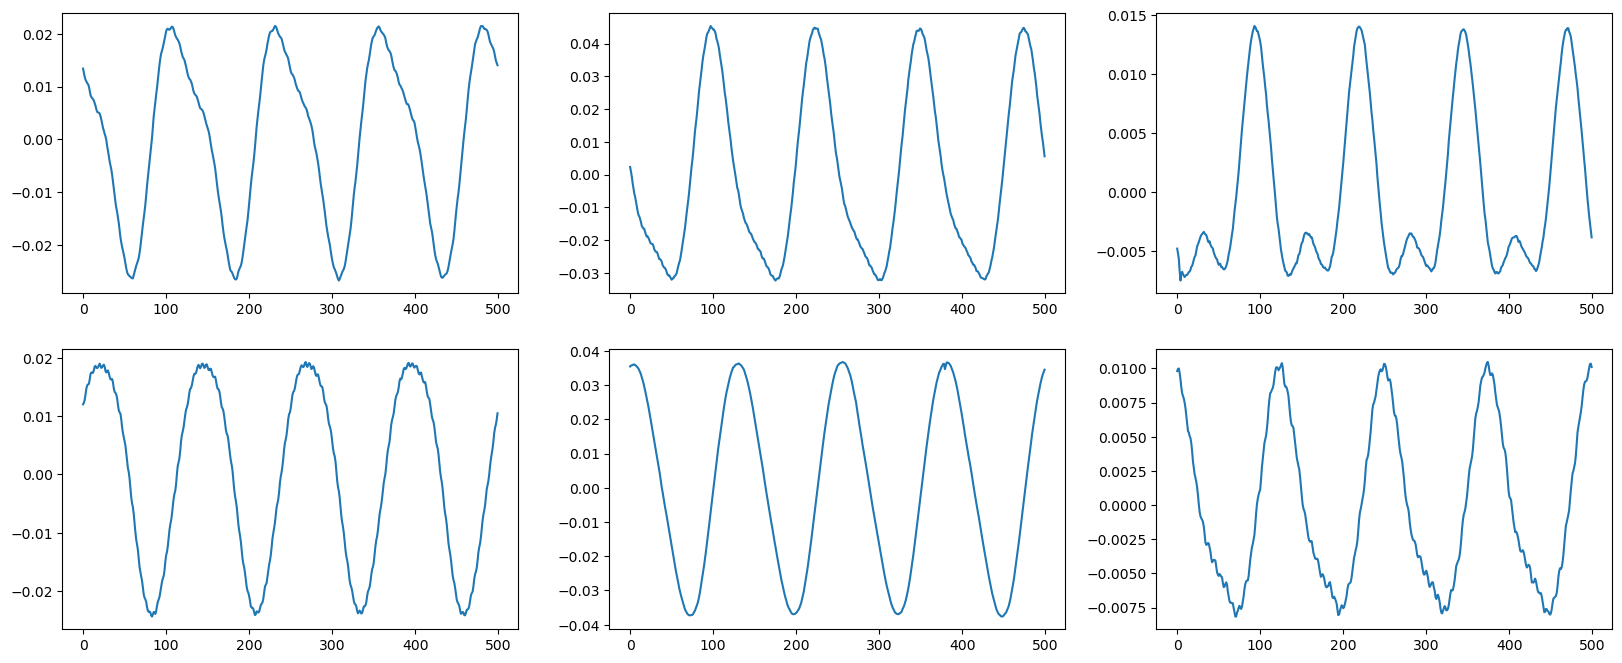

In [16]:
fig, axis = plt.subplots(2,3, figsize=(20,8))

columns = [
    ['X_1 (Mean)', 'X_2 (Mean)', 'X_3 (Mean)'], 
    ['Y_1 (Mean)', 'Y_2 (Mean)', 'Y_3 (Mean)'],
    ]

for i in range(2):
    for j in range(3):
        axis[i, j].plot(df[columns[i][j]][:500])

### No Screw Data

In [ ]:
main_dir = 